## Importación de Librerías

Comenzaremos importando las librerías necesarias para nuestro análisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from transformers import pipeline

## Carga de Datos

Cargamos los datos desde el archivo CSV en un DataFrame de pandas.

In [2]:
data = pd.read_csv("dataset/top_items_reviews.csv")

## División de DataFrame

Divideremos el DataFrame en uno de películas y otro de series

In [3]:
# Dividir el DataFrame en dos: uno para películas y otro para series
movies_df = data[data['type'] == 'movie']
tvshows_df = data[data['type'] == 'tvshow']

# Mostrar las primeras filas de cada DataFrame para verificar
movies_df_titles = movies_df["title"]
tvshows_df_titles = tvshows_df["title"]

# Mostrar los títulos de las películas
print("Películas a elegir:")
for index, title in enumerate(movies_df_titles):
    print(f"{index}. {title}")

# Mostrar los títulos de las series
print("\nSeries a elegir:")
for index, title in enumerate(tvshows_df_titles):
    print(f"{index}. {title}")



Películas a elegir:
0. The Zone of Interest
1. Renaissance: A Film by Beyoncé
2. Oppenheimer
3. All of Us Strangers
4. Past Lives

Series a elegir:
0. Blue Eye Samurai
1. Scavengers Reign
2. Carol & The End of The World
3. Fellow Travelers
4. Beef


## Selección de Película y Serie
Seleccionaremos la película y la serie de la que busquemos realizar el análisis de datos. Para esta elección tendrás que cambiar el número que aparece en el iloc, mediante los índices dados en el apartado de arriba.

In [4]:
# Seleccionando la primera película del DataFrame de películas para el análisis
selected_movie = movies_df.iloc[0]

# Seleccionando la primera serie del DataFrame de series para el análisis
selected_tvshow = tvshows_df.iloc[0]

# Mostrar la información de la película seleccionada
selected_movie_info = selected_movie[['title', 'release_date', 'genres', 'user_reviews', 'critic_reviews']]
print(selected_movie_info)

print("\n")

# Mostrar la información de la serie seleccionada
selected_tvshow_info = selected_tvshow[['title', 'release_date', 'genres', 'user_reviews', 'critic_reviews']]
print(selected_tvshow_info)

title                                          The Zone of Interest
release_date                                             2023-12-15
genres                                  {'History', 'War', 'Drama'}
user_reviews      [('8', 'Loved the performances. Something very...
critic_reviews    [(10.0, '“To write poetry after Auschwitz is b...
Name: 0, dtype: object


title                                              Blue Eye Samurai
release_date                                             2023-11-03
genres            {'Animation', 'Drama', 'Action', 'Adventure', ...
user_reviews      [('10', "I seriously cannot wait for season 2....
critic_reviews    [(10.0, "From its breathtaking action to its n...
Name: 5, dtype: object


## Wordcloud

Primero definimos el método que generará la wordcloud, de manera que podremos usarlo tanto para diferentes reseñas (críticas y de usuarios), como diferentes items (películas y series)


In [5]:

# Función para generar un wordcloud a partir de las reseñas
def generate_wordcloud(reviews,title):
    text = " ".join([review for score, review in reviews])
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap="viridis",contour_color="steelblue").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20, fontweight='bold', pad=30)
    plt.axis('off')
    plt.show()



Procedemos a generar las wordcloud para la película y la serie

# Pelicula

Reseñas de usuarios:
8. Loved the performances. Something very disturbing in the manner that an ordinary family accepted what was happening next door. Certain elements did throw me but on the whole definitely worth a watch.
10. Amazing cinematography and sound. An Intense experience. Loved it. See it in a theater.
10. Beautiful. This is the best film I have ever seen on the banality of evil, and on the effects of extreme compartmentalization on empathy. It is almost a negative of banal materialistic dreams, deformed, monstrous in plain daylight. It is about two stories, the one we hear and the one we see, in constant dialog and dissonance. It is gut wrenching, terrible and an essential watch.
10. You just know when you are watching a Jonathan Glazer movie there is going to be a one of a kind experience, beautifully shot, and intensely thought provoking. All of which are true with this movie, And the way that it communicates the devastation of the holocaust through sound is entirely uni

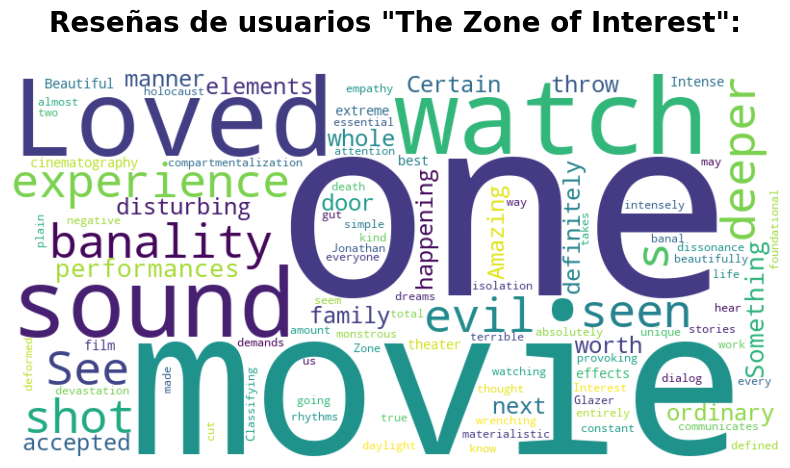

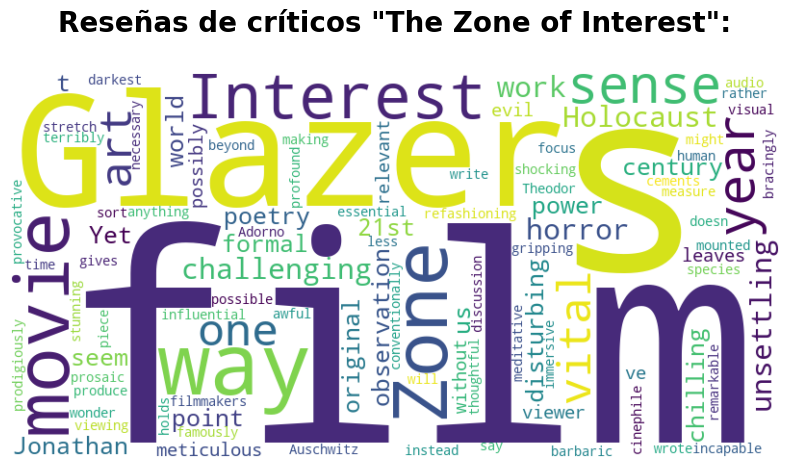

In [6]:

# Preprocesamiento y análisis de las reseñas de usuarios y críticos
user_reviews_movie = ast.literal_eval(selected_movie['user_reviews'])
critic_reviews_movie = ast.literal_eval(selected_movie['critic_reviews'])

print("Reseñas de usuarios:")
for score, review in user_reviews_movie:
    print(f"{score}. {review}")

# Generar y mostrar wordcloud para las reseñas de usuarios
generate_wordcloud(user_reviews_movie, f"Reseñas de usuarios \"{selected_movie['title']}\":")

# Generar y mostrar wordcloud para las reseñas de críticos
generate_wordcloud(critic_reviews_movie, f"Reseñas de críticos \"{selected_movie['title']}\":")

# Serie

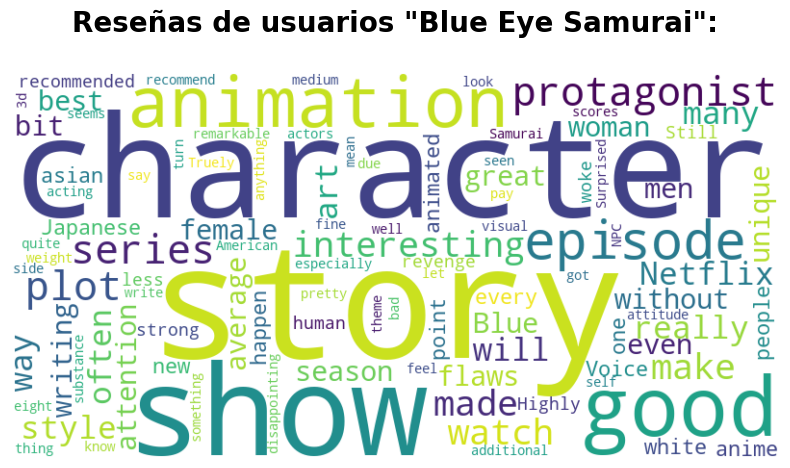

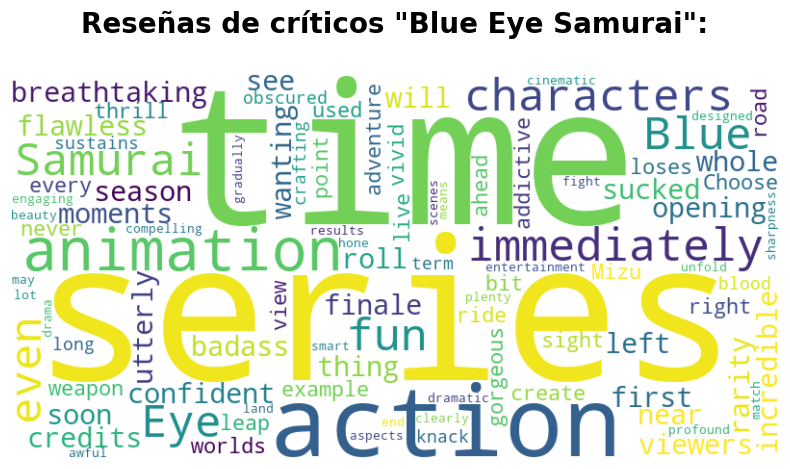

In [7]:
# Preprocesamiento y análisis de las reseñas de usuarios y críticos
user_reviews_tvshow = ast.literal_eval(selected_tvshow['user_reviews'])
critic_reviews_tvshow = ast.literal_eval(selected_tvshow['critic_reviews'])

# Generar y mostrar wordcloud para las reseñas de usuarios
generate_wordcloud(user_reviews_tvshow, f"Reseñas de usuarios \"{selected_tvshow['title']}\":")

# Generar y mostrar wordcloud para las reseñas de críticos
generate_wordcloud(critic_reviews_tvshow, f"Reseñas de críticos \"{selected_tvshow['title']}\":")

In [33]:
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)
output = []

for _,user_review in user_reviews_movie:
    classifier_output = classifier(user_review)
    print(classifier_output[0])
    output.append((int(_),user_review, classifier_output[0]))
    
for _,critic_review in critic_reviews_movie:
    classifier_output = classifier(critic_review)
    output.append((int(_),critic_review, classifier_output[0]))

[{'label': 'love', 'score': 0.8985227942466736}, {'label': 'admiration', 'score': 0.269417941570282}, {'label': 'approval', 'score': 0.10671007633209229}, {'label': 'disappointment', 'score': 0.051194772124290466}, {'label': 'realization', 'score': 0.023644594475626945}, {'label': 'annoyance', 'score': 0.023495925590395927}, {'label': 'disapproval', 'score': 0.017235612496733665}, {'label': 'joy', 'score': 0.01306433416903019}, {'label': 'neutral', 'score': 0.012289367616176605}, {'label': 'sadness', 'score': 0.010978976264595985}, {'label': 'confusion', 'score': 0.008904946967959404}, {'label': 'anger', 'score': 0.008902905508875847}, {'label': 'disgust', 'score': 0.008247451856732368}, {'label': 'optimism', 'score': 0.006131004076451063}, {'label': 'surprise', 'score': 0.004689414985477924}, {'label': 'caring', 'score': 0.004182055126875639}, {'label': 'excitement', 'score': 0.003948813304305077}, {'label': 'desire', 'score': 0.00322990445420146}, {'label': 'curiosity', 'score': 0.00

In [35]:
from collections import defaultdict

# Inicializar variables para análisis
total_score = 0
sentiment_scores = defaultdict(float)
num_reviews = len(output)

# Procesamiento de cada tupla
for score, review, sentiments in output:
    total_score += score

    # Sumar los puntajes de los sentimientos
    for sentiment in sentiments:
        sentiment_scores[sentiment['label']] += sentiment['score']

# Calcular promedio de puntuaciones
average_score = total_score / num_reviews

# Calcular promedio de puntuaciones de sentimientos
for sentiment in sentiment_scores:
    sentiment_scores[sentiment] /= num_reviews

# Ordenar y obtener los sentimientos más comunes
sorted_sentiments = sorted(sentiment_scores.items(), key=lambda x: x[1], reverse=True)
top_sentiments = sorted_sentiments[:5]  # Ajustar la cantidad según sea necesario

# Mostrar resultados
print(f"Promedio de Calificación: {average_score:.2f}")
print("Sentimientos Principales y sus Promedios:")
for sentiment, avg_score in top_sentiments:
    print(f"  {sentiment}: {avg_score:.2f}")


Promedio de Calificación: 9.92
Sentimientos Principales y sus Promedios:
  admiration: 0.32
  neutral: 0.27
  approval: 0.14
  fear: 0.07
  love: 0.06
